#  Electric Commercial Vehicles Announcement Analyse(292-302)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
#隐藏代码
from IPython.display import display_html 
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle Code</button>""", raw=True)


Toggle Code

In [2]:
#原始数据载入
primary_data=pd.read_excel(r"C:\Users\chirs\Documents\Python\Catalogue\292-303.xlsx",sheetname="280-301")
#提取目标数据
data=primary_data[['产品型号','产品商标','产品名称','批次','车辆类型','外形尺寸（长×宽×高）长（mm）','总质量（kg）','整备质量（kg）','准拖挂车总质量（kg）','驱动电机安装数量','变速器档位数','变速器各档位传动比','主减速器速比(驱动桥速比)','电动汽车驱动电机额定功率/转速/转矩（kW/r/min/N.m）','电动汽车驱动电机峰值功率/转速/转矩（kW/r/min/N.m）','后桥（轴）生产企业','电动汽车驱动电机生产企业','储能装置总储电量（kWh）','储能装置总成标称电压（V）','储能装置总成质量（kg）','电动汽车储能装置种类']]

In [3]:
#函数定义
#数字提取
def num_extract(extract_str,integer,emptyReturn,returnnum):
    if integer=='integer':
        Rexp='\d+'
    elif integer=='decimal':
        Rexp='\d{1,5}(?:\.\d+)?'
    else:
        print('Error input in num_extract')
    if type(extract_str)==str:
        extract_str=re.findall(Rexp,extract_str)
        if extract_str==[]:
            extract_str=np.array([emptyReturn])
        else:
            extract_str=np.array(list(map(float,extract_str)))
            if returnnum==1:
                extract_str=float(extract_str.max())
    return(extract_str)
#车类分析
def overall_num(EV,reference):
    reference_color='r'
    EV_reference=EV[EV['产品商标']==reference]
    fig=plt.figure(figsize=(12,6))
    ax1=fig.add_subplot(1,2,1)
    brand=EV['产品商标'].value_counts()[:10]
    plt.bar(np.arange(10),brand)
    ax1.set_xticks(np.arange(10))
    ax1.set_xticklabels(brand.index.values,rotation=30)
    if reference in brand.index:
        reference_loc=brand.index.get_loc(reference)
        plt.bar(reference_loc,brand.iloc[reference_loc],color=reference_color)
    plt.ylabel('公告车型数量')
    
    
    ax2=fig.add_subplot(1,2,2)
    brand=EV['车型细分'].value_counts()
    reference_brand=EV_reference['车型细分'].value_counts()
    brand=pd.DataFrame({0:brand,1:reference_brand})
    brand=brand.fillna(0)
    brand[0]=brand[0]-brand[1]
    brand=brand.sort_values(by=0,ascending=False)
    plt.bar(np.arange(brand.index.size),brand[1],color=reference_color,label=reference)
    plt.bar(np.arange(brand.index.size),brand[0],bottom=brand[1],label='行业')
    ax2.set_xticks(np.arange(brand.index.size))
    ax2.set_xticklabels(brand.index.values,rotation=30)
    ax2.legend(loc='best')
    #plt.bar(np.arange(brand.index.size),reference_brand,color='r') 
    plt.xlabel('细分车型')
    plt.ylabel('公告车型数量')
    plt.subplots_adjust(wspace=0.2)
    
def overall_columns(EV,reference):
    if '卡车' in EV.loc[EV.index.values[1],'车型大类']:
        flag='总质量（kg）'
    else:
        flag='外形尺寸（长×宽×高）长（mm）'
    reference_color='r'
    EV_reference=EV[EV['产品商标']==reference]
    fig=plt.figure(figsize=(12,10))
    ax1=fig.add_subplot(2,2,1)
    plt.semilogx(EV[flag],EV['轮端最大扭矩'],'.',label='行业')
    plt.semilogx(EV_reference[flag],EV_reference['轮端最大扭矩'],'.',color='r',label=reference)
    plt.xlabel(flag)
    plt.ylabel('轮端最大扭矩(Nm)')
    ax1.set_title('轮端最大扭矩分布')
    plt.grid()
    ax1.legend(loc='best')
    
    ax2=fig.add_subplot(2,2,2)
    plt.semilogx(EV[flag],EV['额定输出功率'],'.',label='行业')
    plt.semilogx(EV_reference[flag],EV_reference['额定输出功率'],'.',color='r',label=reference)
    plt.xlabel(flag)
    plt.ylabel('额定输出功率(kW)')
    plt.title('额定输出功率分布')
    plt.grid()
    ax2.legend(loc='best')
    
    ax3=fig.add_subplot(2,2,3)
    plt.semilogx(EV[flag],EV['储能装置总成标称电压（V）'],'.',label='行业')
    plt.semilogx(EV_reference[flag],EV_reference['储能装置总成标称电压（V）'],'.',color='r',label=reference)
    plt.xlabel(flag)
    plt.ylabel('电压（V）')
    plt.title('电池电压分布')
    plt.grid()
    ax3.legend(loc='best')
    
    ax4=fig.add_subplot(2,2,4)
    plt.semilogx(EV[flag],EV['储能装置总储电量（kWh）'],'.',label='行业')
    plt.semilogx(EV_reference[flag],EV_reference['储能装置总储电量（kWh）'],'.',color='r',label=reference)
    plt.xlabel(flag)
    plt.ylabel('电量（kWh）')
    plt.title('电池电量分布')
    plt.grid()
    ax4.legend(loc='best')
    if flag=='总质量（kg）':
        label_list=list(truck_classifi)
    else:
        label_list=[6000,7000,8000,9000,10000,11000,12000,18000]
    ax1.set_xticks(label_list)
    ax1.set_xticklabels(label_list,rotation=30)
    ax2.set_xticks(label_list)
    ax2.set_xticklabels(label_list,rotation=30)
    ax3.set_xticks(label_list)
    ax3.set_xticklabels(label_list,rotation=30)
    ax4.set_xticks(label_list)
    ax4.set_xticklabels(label_list,rotation=30)   
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
#单车型分析
def dir_percent(EV):
    pivot_Dir=pd.pivot_table(EV[EV['驱动形式']=='直驱'],index=['批次'],columns=['车型细分'],values=['产品型号'],aggfunc=[len],fill_value=0,margins=True)
    pivot_Dir=pivot_Dir.cumsum()
    pivot_Trans=pd.pivot_table(EV,index=['批次'],columns=['车型细分'],values=['产品型号'],aggfunc=[len],fill_value=0,margins=True)
    pivot_Trans=pivot_Trans.cumsum()
    pivot_drive=pivot_Dir.div(pivot_Trans,fill_value=0)
    pivot_drive.fillna(0,inplace=True)
    return(pivot_drive)

def motor_performence(EV,vehicle_name):
    motor=EV[EV['车型细分']==vehicle_name]
    motor=motor[['电机最高转速','电机最大扭矩']]
    motor=pd.pivot_table(motor,index=['电机最高转速','电机最大扭矩'],aggfunc=[len])
    n=np.arange(0,len(motor))
    T=np.arange(0,len(motor))
    for i in range(0,len(motor)): 
        n[i]=motor.index.values[i][0]
    for i in range(0,len(motor)): 
        T[i]=motor.index.values[i][1]
    s=motor.iloc[:,0] *10
    return(n,T,s)

def vehicle_figure(EV,vehicle_name,reference):
    #行业直驱占比
    fig=plt.figure(figsize=(12,6))
    ax1=fig.add_subplot(1,2,1)
    pivot_drive=dir_percent(EV)
    try:
        plt.plot(pivot_drive.index.values[0:-1],pivot_drive[0:-1][('len', '产品型号', vehicle_name)].values,label='行业')
    except:
        pass        
    EV_reference=EV[EV['产品商标']==reference]
    pivot_drive_reference=dir_percent(EV_reference)
    try:
        plt.plot(pivot_drive_reference.index.values[0:-1],pivot_drive_reference[0:-1][('len', '产品型号', vehicle_name)].values,color='r',label=reference)
    except:
        pass
    plt.xlabel('批次')
    plt.ylabel('直驱占比')
    ax1.set_ylim(0,1.1)
    plt.title('%s 车型各批直驱占比（累加）'%(vehicle_name))
    ax1.legend(loc='best')
    #参考企业直驱占比
    ax2=fig.add_subplot(1,2,2)
    EV_reference=EV[EV['产品商标']==reference] 
    n,T,s=motor_performence(EV,vehicle_name)
    plt.scatter(n,T,s,alpha=1,label='行业')
    try:
        nr,Tr,sr=motor_performence(EV_reference,vehicle_name)
        plt.scatter(nr,Tr,sr,alpha=1,color='r',label=reference)
    except:
        pass
    plt.xlabel('最高转速(rad/min)')
    plt.ylabel('最大扭矩(Nm)')
    plt.title('%s 车型电机配置'%(vehicle_name))
    plt.subplots_adjust(wspace=0.2)
    ax2.legend(loc='best')
    

In [4]:
#数据清洗
data=data.sort_values(by='批次',ascending=False)
data=data.drop_duplicates(subset='产品型号',keep='first')
data=data.fillna({'主减速器速比(驱动桥速比)':float(1),'变速器各档位传动比':float(1),'准拖挂车总质量（kg）':int(0),'整备质量（kg）':int(0)})
for i in data.index:
    if '城市客车' in data.loc[i,'产品名称']:
        data.loc[i,'车型大类']='公交'
    elif '客车' in data.loc[i,'产品名称']:  
        data.loc[i,'车型大类']='大巴'
    elif '乘用车' in data.loc[i,'产品名称']:
        data.loc[i,'车型大类']='乘用车'
    else:
        data.loc[i,'车型大类']='卡车'
    if '纯电动' not in data.loc[i,'产品名称']:
        data=data.drop([i])
#计算轮端最大扭矩与额定输出功率    
    try:
        motor_num=data.loc[i,'驱动电机安装数量']
        motor_num=num_extract(motor_num,'integer',1,1)
        motor_e=data.loc[i,'电动汽车驱动电机额定功率/转速/转矩（kW/r/min/N.m）']
        motor_e=num_extract(motor_e,'decimal',0,0)
        Pe=float(motor_e[0])
        data.loc[i,'额定输出功率']=Pe*motor_num
        motor_z=data.loc[i,'电动汽车驱动电机峰值功率/转速/转矩（kW/r/min/N.m）']
        motor_z=num_extract(motor_z,'decimal',0,0)
        Tz=float(motor_z[2])
        nz=float(motor_z[1])
        data.loc[i,'电机最大扭矩']=Tz*motor_num
        data.loc[i,'电机最高转速']=nz
        i1,i0=data.loc[i,['变速器各档位传动比','主减速器速比(驱动桥速比)']]
        i1=num_extract(i1,'decimal',1,0)
        i0=num_extract(i0,'decimal',1,1)
        if type(i1)==float:
            data.loc[i,'驱动形式']='直驱'
            data.loc[i,'轮端最大扭矩']=Tz*i1*i0*motor_num
        else:
            data.loc[i,'轮端最大扭矩']=Tz*i1.max()*i0*motor_num
        if len(i1)==1:
                data.loc[i,'驱动形式']='直驱'
        else:
                data.loc[i,'驱动形式']='非直驱'
        data.loc[i,'驱动电机安装数量']=motor_num
        data.loc[i,['变速器各档位传动比','主减速器速比(驱动桥速比)']]=i1,i0
    except:
        pass
#清洗质量与车长
data[['总质量（kg）','整备质量（kg）','准拖挂车总质量（kg）','外形尺寸（长×宽×高）长（mm）']].astype(int,copy='False',errors='ignore')
for i in data.index:
    m_full=data.loc[i,'总质量（kg）']
    m_curb=data.loc[i,'整备质量（kg）']
    m_trailer=data.loc[i,'准拖挂车总质量（kg）']
    length=data.loc[i,'外形尺寸（长×宽×高）长（mm）']
    m_full=num_extract(m_full,'integer',0,1)
    data.loc[i,'总质量（kg）']=m_full
    m_curb=num_extract(m_curb,'integer',0,1)
    data.loc[i,'整备质量（kg）']=m_curb
    m_trailer=num_extract(m_trailer,'integer',0,1)
    data.loc[i,'准拖挂车总质量（kg）']=m_trailer
    length=num_extract(length,'integer',0,1)
    data.loc[i,'外形尺寸（长×宽×高）长（m）']=length
    if m_trailer!=0:
        m_full=m_full+m_trailer
    data.loc[i,'总质量（kg）']=m_full
    data.loc[i,'整备质量（kg）']=m_curb
    data.loc[i,'准拖挂车总质量（kg）']=m_trailer
    data.loc[i,'外形尺寸（长×宽×高）长（mm）']=length
    voltage=data.loc[i,'储能装置总成标称电压（V）']
    electricity=data.loc[i,'储能装置总储电量（kWh）']
    voltage=num_extract(voltage,'decimal',0,1)
    electricity=num_extract(electricity,'decimal',0,1)
    data.loc[i,'储能装置总成标称电压（V）']=voltage
    data.loc[i,'储能装置总储电量（kWh）']=electricity


In [5]:
#数据分类
menue_EV=data.groupby(['车型大类'])
menue_EV=dict(list(menue_EV))
EVtruck=pd.DataFrame(menue_EV['卡车'])
EVbus=pd.DataFrame(menue_EV['公交'])
EVcoach=pd.DataFrame(menue_EV['大巴']) 
#添加细分车型标签
#卡车按吨位细分
truck_classifi=np.array([2800,3500,4500,7500,12000,14000,16000,18000,25000,32000])
EVtruck['车型细分']='%st'%(truck_classifi[0]/1000)
for i in np.arange(0,len(truck_classifi)-1):
    a=EVtruck[EVtruck['总质量（kg）']<truck_classifi[-(1+i)]].index
    b=EVtruck[EVtruck['总质量（kg）']<truck_classifi[-(2+i)]].index
    c=a.difference(b)
    EVtruck.loc[c,'车型细分']='%st'%(truck_classifi[-(1+i)]/1000)

#大巴按米端细分
length=EVcoach['外形尺寸（长×宽×高）长（mm）']
length=(length/1000).apply(math.floor)
EVcoach['车型细分']=length
# 公交按米段细分
length=EVbus['外形尺寸（长×宽×高）长（mm）']
length=(length/1000).apply(math.floor)
EVbus['车型细分']=length

## Truck Power Train Analyse

### Overall 

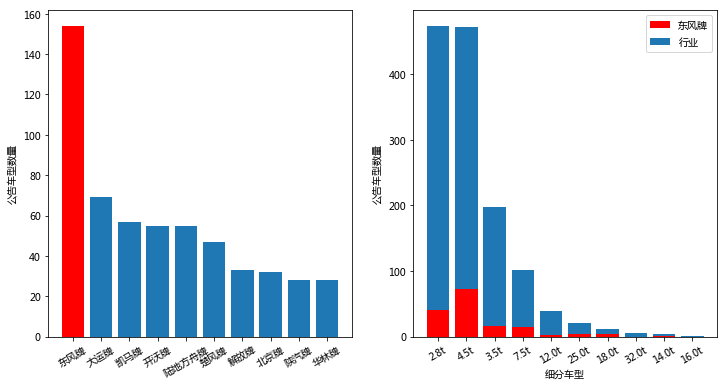

In [6]:
overall_num(EVtruck,'东风牌')

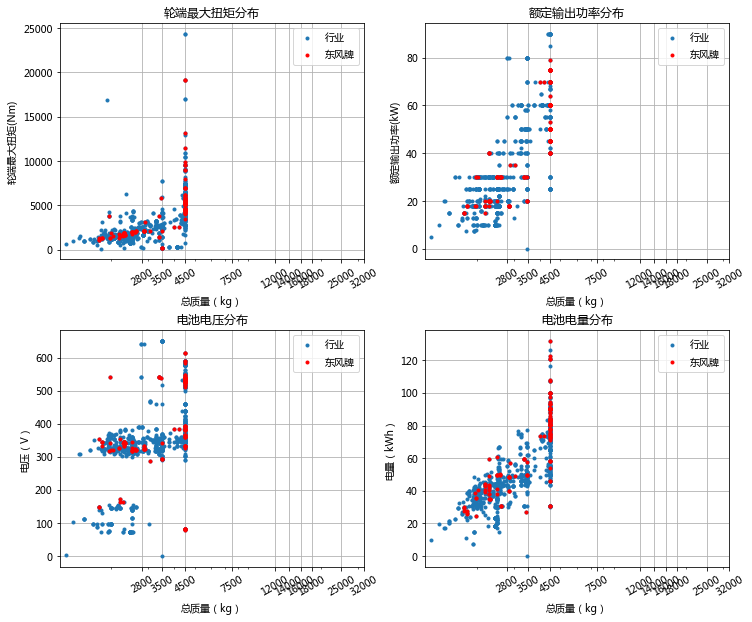

In [7]:
overall_columns(EVtruck[EVtruck['总质量（kg）']<4500],'东风牌')

### Subtype Truck

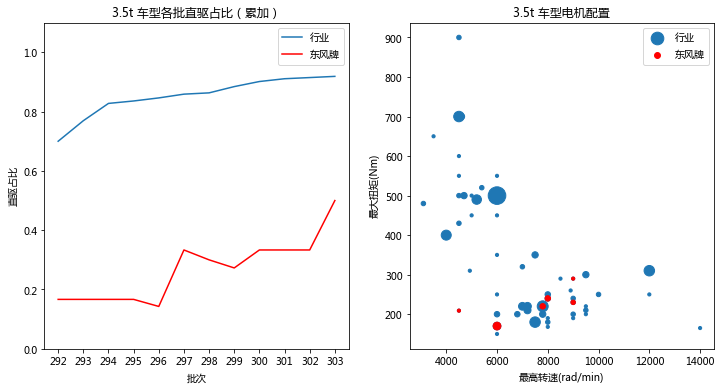

In [8]:
vehicle_figure(EVtruck,'3.5t','东风牌')

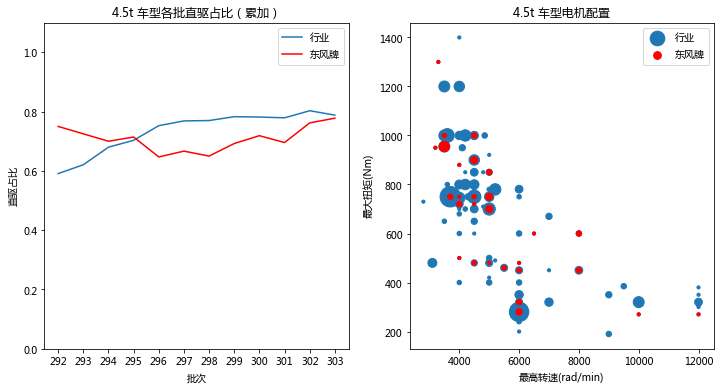

In [9]:
vehicle_figure(EVtruck,'4.5t','东风牌')

## Bus Power Train Anaslye

### overall

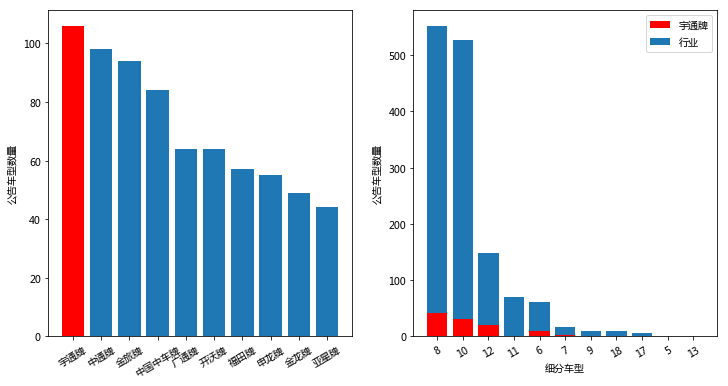

In [10]:
overall_num(EVbus,'宇通牌')

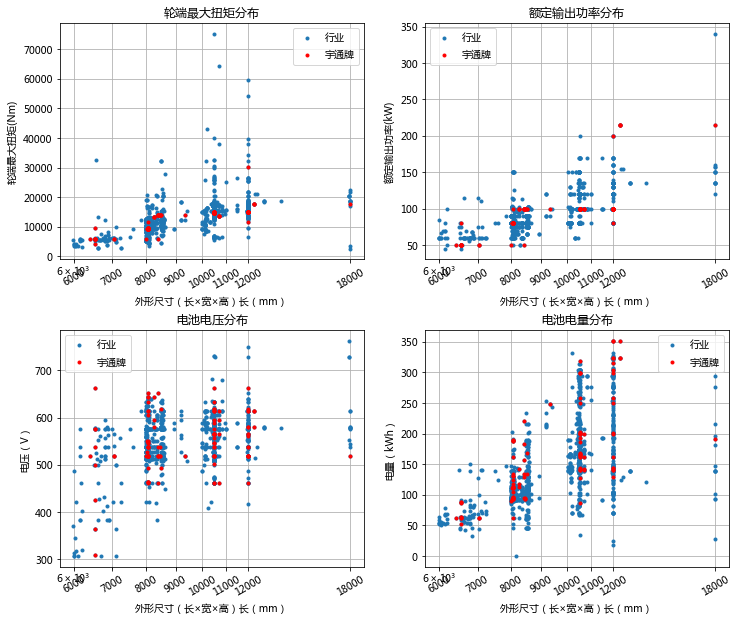

In [11]:
overall_columns(EVbus,'宇通牌')

## Coach Power train Analyse

### Overall

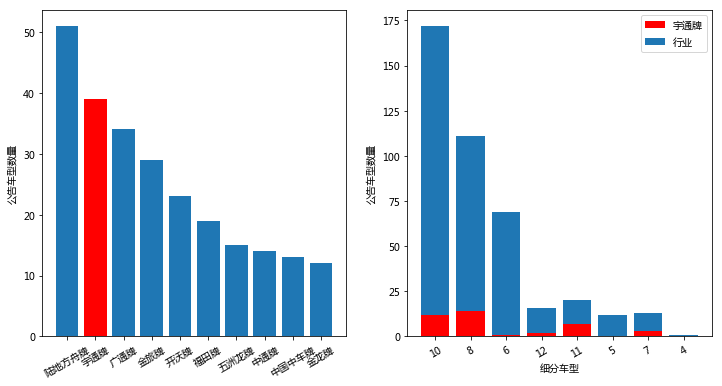

In [12]:
overall_num(EVcoach,'宇通牌')

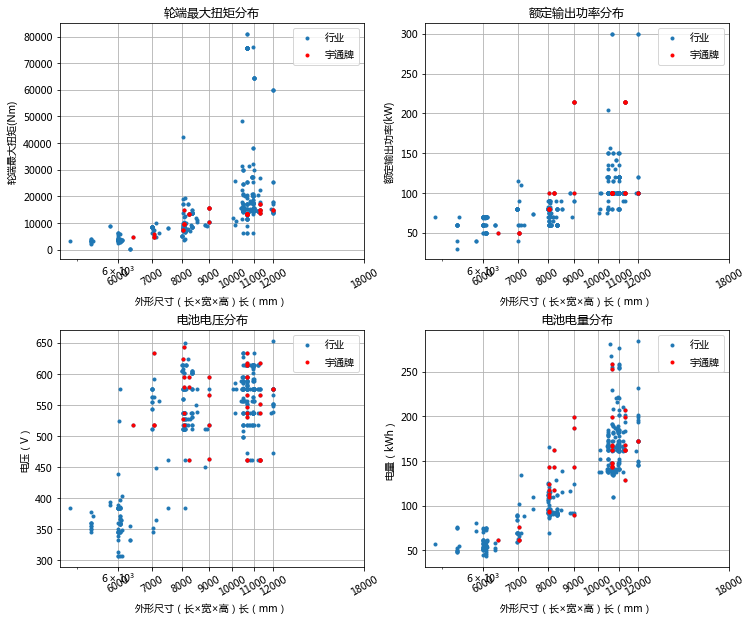

In [13]:
overall_columns(EVcoach,'宇通牌')